# ⌛Time Series Data⌛

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf
import seaborn as sns
sns.set()

import warnings
warnings.filterwarnings("ignore")

## Functions Created😊

In [25]:
#Perform Dickey-Fuller test:
def dickey_Fuller_test(ts):
    from statsmodels.tsa.stattools import adfuller
    print('Results of Dickey&Fuller Test:')
    dftest = adfuller(ts,autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value(%s)'%key]=value
    print(dfoutput)
     # se a significância estiver abaixo de 0.05, significa que há pouca influência nos dados. 
    if dfoutput[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data is stationary")
    else:
        print("weak evidence against null hypothesis, indicating it is non-stationary ")
        
def decomposition(ts = None,T = None, title = 'Decomposition e Histogram'):

    # Vamos realizar uma decomposição aditiva da nossa série, e estudar sua tendência, sazonalidade e resíduo.
    decomposition = seasonal_decompose(ts,period=T) 

    fig, ax = plt.subplots(5, 1, figsize=(16, 10))
    fig.suptitle(title, fontsize=16)

    decomposition.observed.plot(ax=ax[0],color='#99aacc'); ax[0].set_ylabel('observed')
    decomposition.trend.plot(ax=ax[1],color='#9900aa'); ax[1].set_ylabel('trend')
    decomposition.seasonal.plot(ax=ax[2],color='#0099aa'); ax[2].set_ylabel('seasonal')
    decomposition.resid.plot(ax=ax[3],color='#eeccdd'); ax[3].set_ylabel('resid');
    # Vamos analisar a componente de resíduo com um pouco mais de cuidado:

    decomposition.resid.hist(ax=ax[4],bins=50,color='yellow'); ax[4].set_ylabel('resid_hist');

## Importing the Data😊

In [3]:
raw_csv_data = pd.read_csv('Index2018.csv')
df_comp = raw_csv_data.copy()
df_comp.date = pd.to_datetime(df_comp.date, dayfirst=True)
df_comp.set_index('date', inplace=True)
df_comp = df_comp.asfreq('b')
df_comp = df_comp.fillna(method='ffill')
df_comp['market_value']=df_comp.spx
df_comp_copy = df_comp.copy()

In [4]:
del df_comp['spx']
del df_comp['dax']
del df_comp['ftse']
del df_comp['nikkei']

size = int(len(df_comp)*0.8)
df,df_test = df_comp.iloc[:size], df_comp.iloc[size:]


wn = np.random.normal(loc= df.market_value.mean(), scale=df.market_value.std(), size=len(df))
df['wn'] = wn

rw = pd.read_csv('RandWalk.csv')
rw.date = pd.to_datetime(rw.date, dayfirst=True)
rw.set_index('date', inplace=True)
rw = rw.asfreq('b')
df['rw']= rw.price


df.head()

,market_value,wn,rw
date,,,
1994-01-07,469.90,606.383989,1122.139662
1994-01-10,475.27,875.149920,1080.347860
1994-01-11,474.13,1814.220905,1082.095245
1994-01-12,474.17,804.749342,1083.639265
1994-01-13,472.47,1118.622204,1067.146255


---

## Stationarity:

Colecting consecutive samples of the data with the same size, should have identical covariances regardless of the starting point, known as 'weak-form' stationarity or covariance stationarity.

- covariance stationarity assumptions:
    - constant mean
    - constant variance
    - consistent covariance between period with the same period.[covariance of 1st and 4th period = covariance of 3rd and 6th]
    
example: white noise (mean=0, constant variance, covariance = 0(correlation*std deviations=0) )

---

### Dickey-Fuller Test
To determine if a TS is stationary or non-stationary.

Hipoteses:
- `H0 = (Non-stationary): 1 lag autocorrelation coef < 1`
- `H1 = 1 lag autocorrelation coef < 1`

test statistic < crit. value - reject the H0
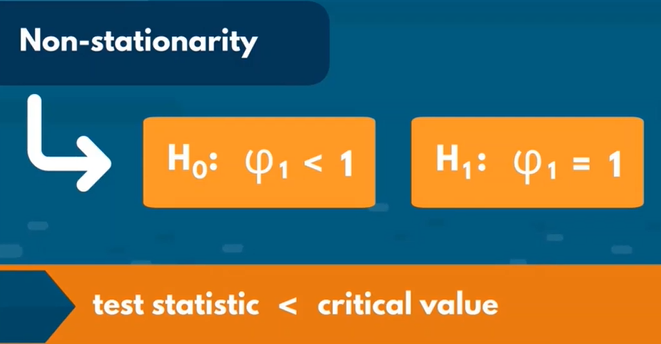

In [10]:
from statsmodels.tsa.stattools import adfuller
adfuller(df.market_value)

(-1.7369847452352463,
 0.4121645696770607,
 18,
 5002,
 {'1%': -3.431658008603046,
  '5%': -2.862117998412982,
  '10%': -2.567077669247375},
 39904.880607487445)

1: Test Statistic: compare with the critical values to determine whether we have significantly proof os stationary.

the critical values are the 1%,5% and 10%. Above, we see the T statistic it's greater than each of the critical values, thus for all this level of significance we don't find sufficient evidence of stationarity

2: p-value - almost 41% chance of not rejecting the null hipotese

3: number of lags used in the regression when determining  de t-statistic. So there's some autocorrelation going back 18 period

4: number of observation used in the analysis, it depends on the number of lags used in the regression(the two ad up to the length of the dataset)

In [5]:
#using the function created
dickey_Fuller_test(df.market_value) # lag 18 ,so there is some autocorr

Results of Dickey&Fuller Test:
Test Statistic                   -1.736985
p-value                           0.412165
#Lags Used                       18.000000
Number of Observations Used    5002.000000
Critical Value(1%)               -3.431658
Critical Value(5%)               -2.862118
Critical Value(10%)              -2.567078
dtype: float64
weak evidence against null hypothesis, indicating it is non-stationary 


In [11]:
dickey_Fuller_test(df.wn)# p_value 0 and no lags as expected 

Results of Dickey&Fuller Test:
Test Statistic                  -71.662770
p-value                           0.000000
#Lags Used                        0.000000
Number of Observations Used    5020.000000
Critical Value(1%)               -3.431653
Critical Value(5%)               -2.862116
Critical Value(10%)              -2.567077
dtype: float64
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data is stationary


In [7]:
dickey_Fuller_test(df.rw)

Results of Dickey&Fuller Test:
Test Statistic                   -1.328607
p-value                           0.615985
#Lags Used                       24.000000
Number of Observations Used    4996.000000
Critical Value(1%)               -3.431660
Critical Value(5%)               -2.862119
Critical Value(10%)              -2.567078
dtype: float64
weak evidence against null hypothesis, indicating it is non-stationary 


## 🌞☔🌤  Seasonality ❄ ☔🌞
Trends will appear on a cyclical basis.
ex: Temperature.

slipt into 3 effects:
- trend -> pattern
- seasonal -> cyclical effects
- residual -> errors of prediction

Naive Decomposition:

- <strong>Additive</strong>:

`**observed**= trend+seasonal+residual`

- <strong>Multiplicative</strong>:

`**observed**= trend*seasonal*residual`

In [12]:
from statsmodels.tsa.seasonal import seasonal_decompose

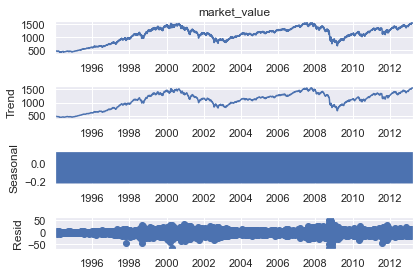

In [13]:
s_dec_add = seasonal_decompose(df['market_value'], model='additive')
s_dec_add.plot();

### Observations:
The trend is very similar to the observed, this is because the decomposition uses the previous periods values as a trend setter. The seasonal looks like a rectangule, the figsize is too small, and the numbers goes up and down between -0.2 and 0.1.
The residuals are the difference between true values and the predictions for any period.
The composition suggests that there are no seasonal in the data

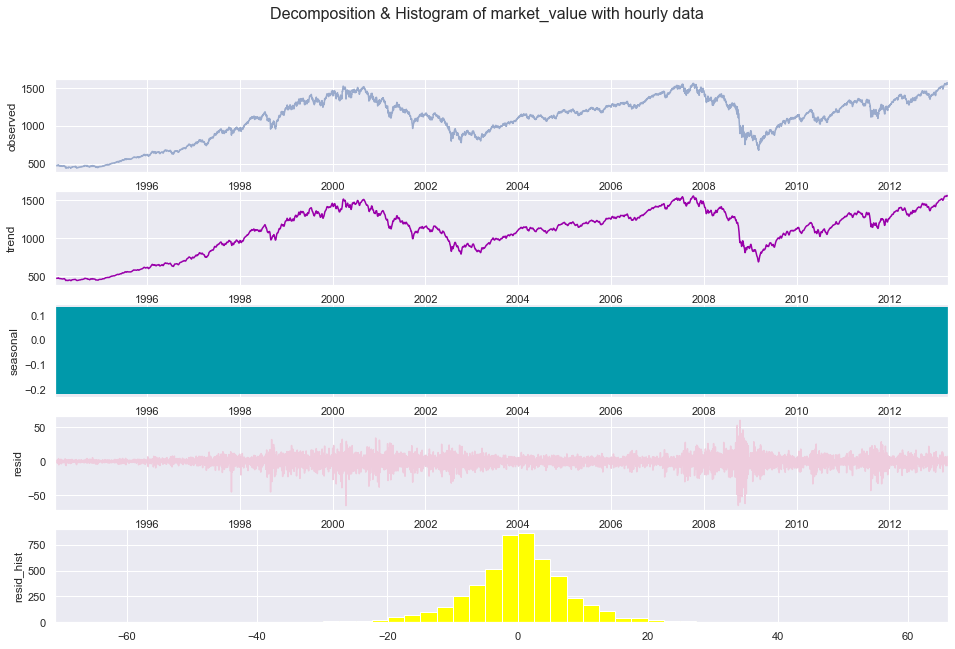

In [20]:

ts = df.market_value
# Vamos realizar uma decomposição aditiva da nossa série, e estudar sua tendência, sazonalidade e resíduo.
decomposition = seasonal_decompose(ts) 

fig, ax = plt.subplots(5, 1, figsize=(16, 10))
fig.suptitle(f'Decomposition & Histogram of market_value with hourly data', fontsize=16)

decomposition.observed.plot(ax=ax[0],color='#99aacc'); ax[0].set_ylabel('observed')
decomposition.trend.plot(ax=ax[1],color='#9900aa'); ax[1].set_ylabel('trend')
decomposition.seasonal.plot(ax=ax[2],color='#0099aa'); ax[2].set_ylabel('seasonal')
decomposition.resid.plot(ax=ax[3],color='#eeccdd'); ax[3].set_ylabel('resid');
# Vamos analisar a componente de resíduo com um pouco mais de cuidado:

decomposition.resid.hist(ax=ax[4],bins=50,color='yellow'); ax[4].set_ylabel('resid_hist');

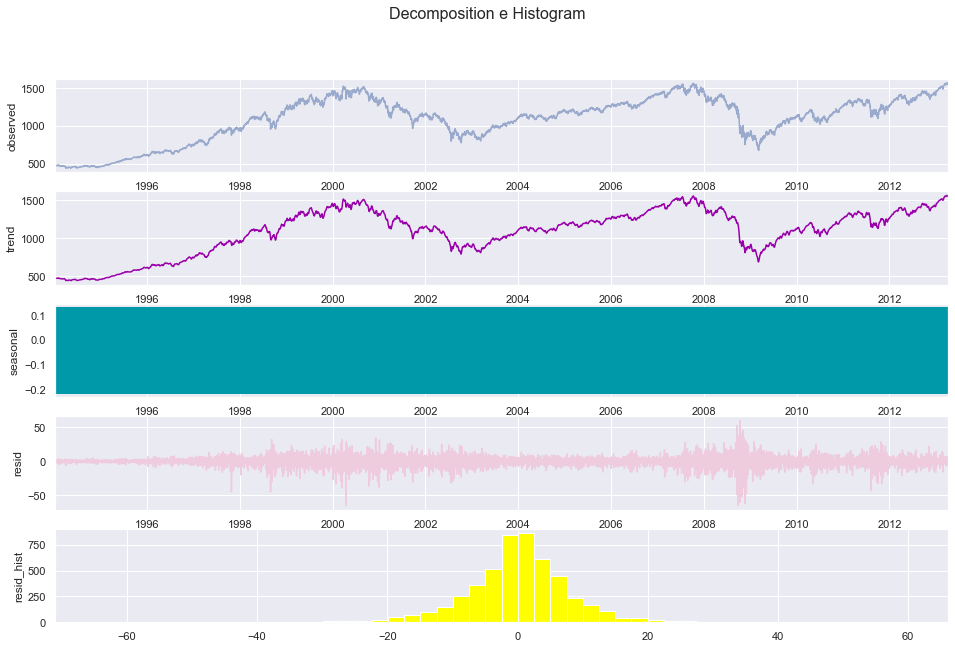

In [27]:
decomposition(df.market_value)

In [21]:
#to check if the residuals are stationary
dickey_Fuller_test(decomposition.resid.dropna())

Results of Dickey&Fuller Test:
Test Statistic                  -19.683457
p-value                           0.000000
#Lags Used                       32.000000
Number of Observations Used    4984.000000
Critical Value(1%)               -3.431663
Critical Value(5%)               -2.862120
Critical Value(10%)              -2.567079
dtype: float64
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data is stationary


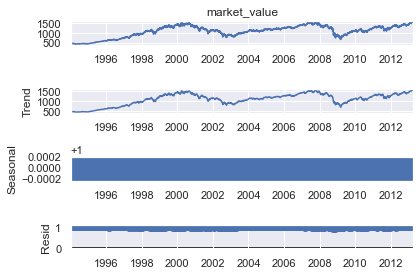

In [47]:
s_dec_add = seasonal_decompose(df.market_value, model='multiplicative')
s_dec_add.plot();

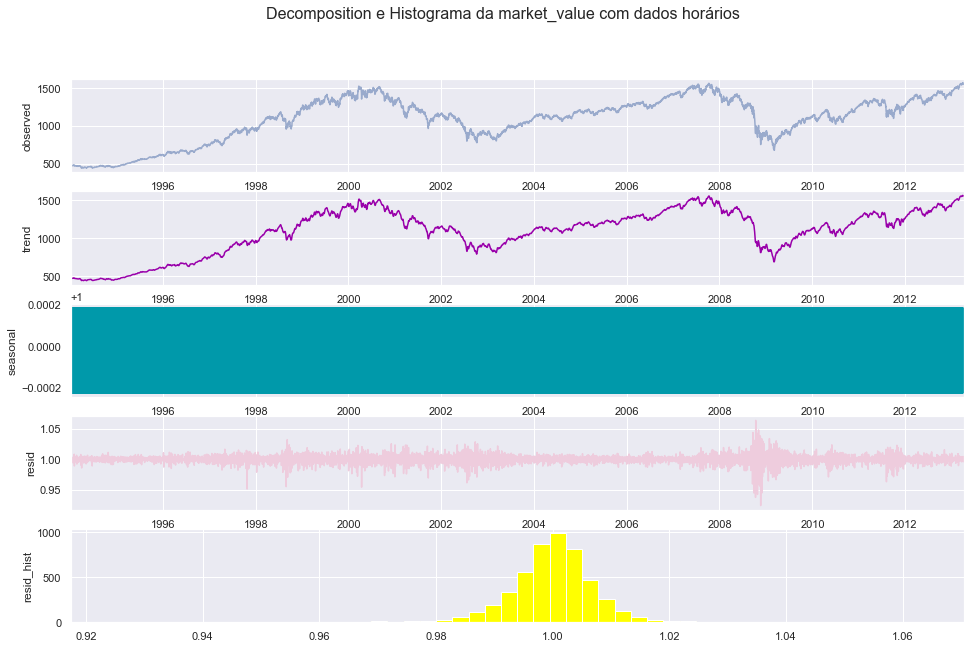

In [28]:

ts = df.market_value
# Vamos realizar uma decomposição aditiva da nossa série, e estudar sua tendência, sazonalidade e resíduo.
decomposition = seasonal_decompose(ts, model='multiplicative')  

fig, ax = plt.subplots(5, 1, figsize=(16, 10))
fig.suptitle(f'Decomposition e Histograma da market_value com dados horários', fontsize=16)

decomposition.observed.plot(ax=ax[0],color='#99aacc'); ax[0].set_ylabel('observed')
decomposition.trend.plot(ax=ax[1],color='#9900aa'); ax[1].set_ylabel('trend')
decomposition.seasonal.plot(ax=ax[2],color='#0099aa'); ax[2].set_ylabel('seasonal')
decomposition.resid.plot(ax=ax[3],color='#eeccdd'); ax[3].set_ylabel('resid');
# Vamos analisar a componente de resíduo com um pouco mais de cuidado:

decomposition.resid.hist(ax=ax[4],bins=50,color='yellow'); ax[4].set_ylabel('resid_hist');

In [29]:
dickey_Fuller_test(decomposition.resid.dropna())

Results of Dickey&Fuller Test:
Test Statistic                  -19.371644
p-value                           0.000000
#Lags Used                       32.000000
Number of Observations Used    4984.000000
Critical Value(1%)               -3.431663
Critical Value(5%)               -2.862120
Critical Value(10%)              -2.567079
dtype: float64
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data is stationary


# Auto-Correlation:

Correlation : measures the similarity in the change of values of two series. We only have a single variable in this case.(time)

That's why:  Autocorrelation.

It's the correlation between a sequence and itself. (lag)

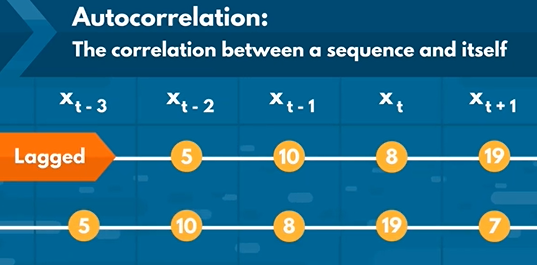

Is the  frequency of the data is daily,with the autocorrelation we're determining how much of the yestarday's values resembles today's values.

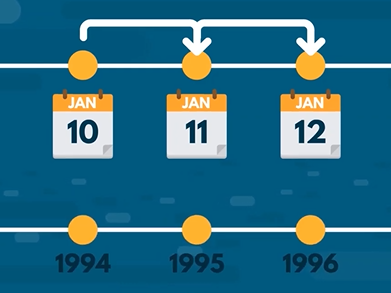

### the autocorrelation function (ACF)

Compute and compare autocorrelation values between diffferent lags

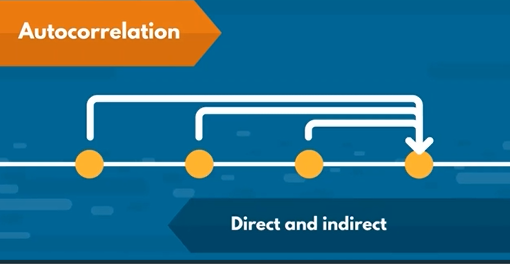

measure the similarly between  TS and a lagged version of itself, however the coefficient also captures the second hand effects. 

#### Indirect effect 
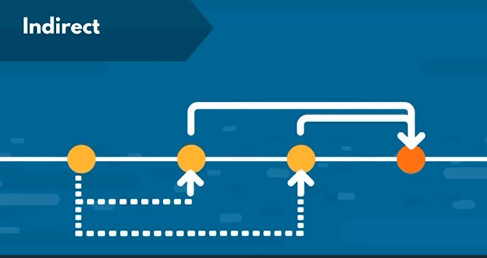
Examing the value of autocorrelation coefficient for the 3rd lag, it captures the indirect and direct ways the lags series affects the original one.

-indirect: All other affect the current data. Example: the price for 3 days ago, affects the value of one and two days ago, then affects the prices today

#### Direct effect 
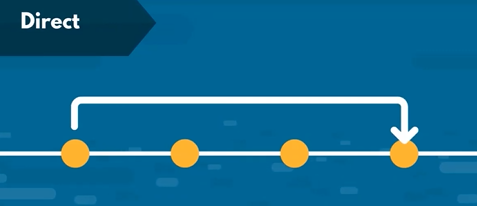
To measure we use the parcial autocorrelation(PACF)

In [17]:
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf

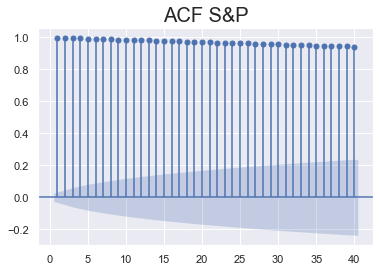

In [18]:
plot_acf(df.market_value, lags=40, zero=False)
plt.title('ACF S&P',size=20);
# lags=40 = the last 40 periods before the current one

 x = lags, y = the possibles values to the correlations coef.
 
 - First line - autocorrelation 1 time period ago
 - Second - 2 time period ago ...
 - the blue area = significance. The values outside are significantily differente from 0, which sugest autocorrelation for the specific lag.
 Significance- OBS: the greater the distance in time, the more unlikely it is that this autocorrelation persists
 
 
 The lags all have significance, or I'd say their coefficient are significant(indicator time dependancy). This means even a lag one month ago would be a good estimator.

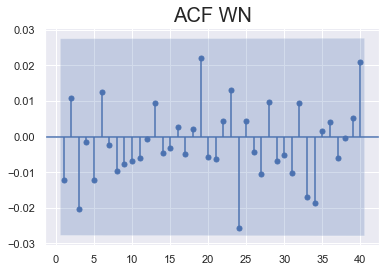

In [55]:
plot_acf(df.wn, lags=40, zero=False)
plt.title('ACF WN',size=20);

the values go either way (up and down) and all the line fall into the blue area (the coef are not significant, there are not autocorrelation ).

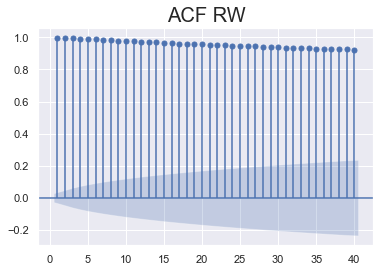

In [19]:
plot_acf(df.rw, lags=40, zero=False)
plt.title('ACF RW',size=20);

Very similar to S&P: their coefficient are significant(indicator time dependancy). This means even a lag one month ago would be a good estimator.

###  Partial Autocorrelation Function (PACF)

Only the direct relationship between the ts and it's lagged version nwe need PACF.

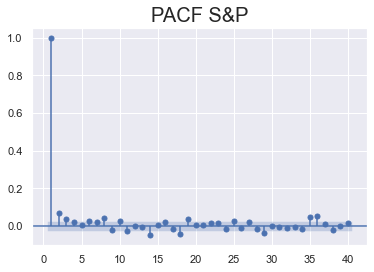

In [58]:
plot_pacf(df.market_value, lags=40, zero=False, method=('ols'))
plt.title('PACF S&P',size=20);


- Almost all the values after the third lag are within the blue area, or , not significantly different from 0.
- The 9th value is negative, this means that higher values nine periods ago results in lower values today, and vice-versa.

PACF- cancels out all additional channels in which a previous period value affects the present one.
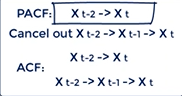

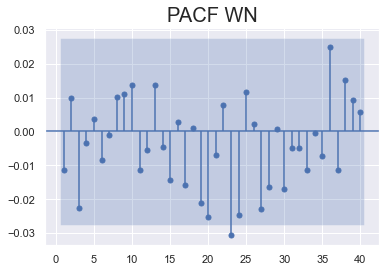

In [31]:
plot_pacf(df.wn, lags=40, zero=False, method=('ols'))
plt.title('PACF WN',size=20);

PAttern positive and negative. And all the lags are in the blue area, therefore it's not significante. There is no autocorrelation in any lag

Very similar to the ACF of the prices. The coef. are all significatives indicating that's has a autocorrelation. 

As expected most values are within  the blue area, so no autocorrelation

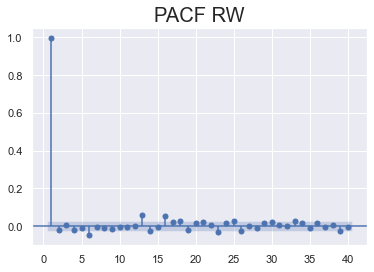

In [61]:
plot_pacf(df.rw, lags=40, zero=False)
plt.title('PACF RW',size=20);

As expected is very similar to the prices data (df.market_value):
- Almost all the values are within the blue area, or , not significantly different from 0.
- some values are negative.

----